In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
from PIL import Image, ImageColor
from wordcloud import WordCloud
import colorsys
from random import Random
import matplotlib.pyplot as plt

In [2]:
def get_single_color_func(color):
    """Create a color function. Accepted values are color strings as usable by
    PIL/Pillow.
    """
    old_r, old_g, old_b = ImageColor.getrgb(color)

    def single_color_func(word=None, font_size=None, position=None,
                          orientation=None, font_path=None, random_state=None):
        return 'rgb({:.0f}, {:.0f}, {:.0f})'.format(old_r, old_g,
                                                    old_b)
    return single_color_func

In [3]:
df = pd.read_csv("final.csv", index_col=0)

In [4]:
df

,Percentage,Online,Offline
Media,,,
Television News,40.53,0,1
Television Show,45.06,0,1
Newspapers,39.93,0,1
Word of mouth,43.35,0,1
Parties Propaganda,21.05,0,1
Tv all news,25.00,0,1
Radio News,21.78,0,1
Parties Websites,14.54,1,0
Political Events,18.62,0,1


In [5]:
perc = [sum(df['Percentage']*df['Online'])/sum(df['Percentage']), sum(df['Percentage']*df['Offline'])/sum(df['Percentage'])]
online = df[df['Online']==1]
offline = df[df['Offline']==1]

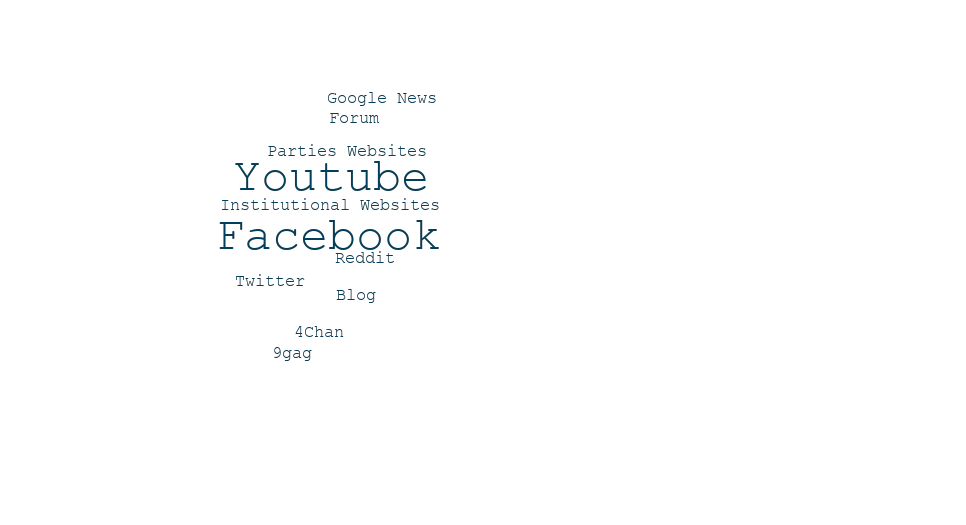

In [7]:
pie_online = np.array(Image.open("mask33.png"))
wordcloud_online = WordCloud(font_path = '/usr/share/fonts/truetype/msttcorefonts/cour.ttf', background_color = None, mask = pie_online, prefer_horizontal=1, mode = 'RGBA',
                            relative_scaling=0)
wordcloud_online.fit_words(online['Percentage'])
wordcloud_online.recolor(color_func=get_single_color_func('#00405d'))
wordcloud_online.to_file('online.png')
wordcloud_online.to_image()


#fig, ax = plt.subplots(figsize=(15,15))
#ax.imshow(wordcloud_online, interpolation="bilinear")
#ax.set_axis_off()
#plt.show()

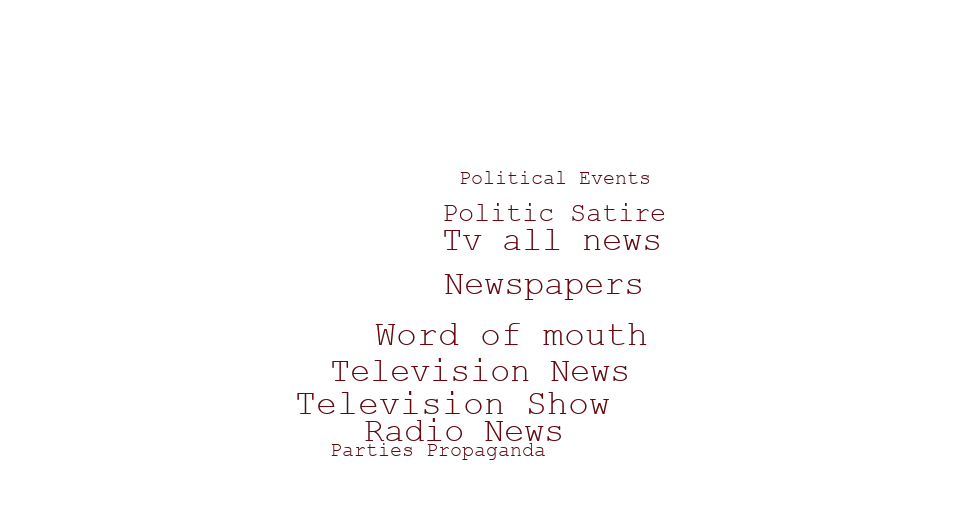

In [8]:
pie_offline = np.array(Image.open("mask66.png"))
wordcloud_offline = WordCloud(font_path = '/usr/share/fonts/truetype/msttcorefonts/cour.ttf',
                              background_color = None, mask = pie_offline, prefer_horizontal=1, mode = 'RGBA',
                              relative_scaling=0)
wordcloud_offline.fit_words(offline['Percentage'])
wordcloud_offline.recolor(color_func=get_single_color_func('#73000b'))
wordcloud_offline.to_file('offine.png')
wordcloud_offline.to_image()

#fig, ax = plt.subplots(figsize=(15,15))
#ax.imshow(wordcloud_offline, interpolation="bilinear")
#ax.set_axis_off()
#plt.show()

In [25]:
import plotly.graph_objects as go

# create pie
fig = go.Figure(data=[go.Pie(labels=['Online','Offline'], values=perc)])

fig.update_layout(
    # update size of the image
    autosize = False, width = 1600, height = 900, margin = dict(l=150, r=0, b=100, t=200, pad=4),
    paper_bgcolor = 'white',
    # and font
    font = dict(family="Courier New, monospace", color="#4d4d4d", size = 30)
)

fig.update_traces(
    # update font of labels
    textfont = dict(size=20),
    textinfo='label+percent', textposition='outside',
    # and colors of pie
    marker=dict(colors=['#80b1d3', '#fb8072'], line=dict(color='dimgray', width=2)))

#title
fig.add_annotation(x=-0.15, y=1.2, xref="paper", yref="paper",
                  text = "Politics: a matter of Offline media",
                  font = dict(family="Courier New, monospace", size = 40, color="#4d4d4d"),
                   xanchor = 'left', yanchor = 'top', align = 'left')


# subtitle
#subtitle = 'Percentage of the influence of Online VS Offline media on our opinions about Politics'
subtitle = 'Offline media still have a great influence on our opinions about Politics'
fig.add_annotation(
     # subtitle
    xref='paper', yref='paper', x=-0.16, y=+1.15, text=subtitle, showarrow=False, align='right',
    xanchor = 'left', yanchor = 'top', font = dict(size=25))

# description
#description = '<span style="color: #73000b; font-weight:bold;"> Offline media </span> <br>still have a great <br>influence on our <br>opinions about <br> Politics'
description = 'Percentage of <br>the influence of <br><span style="color: #00405d; font-weight:bold;"> Online media </span> VS <br><span style="color: #73000b; font-weight:bold;"> Offline media </span> <br>on our opinions <br>about Politics'
fig.add_annotation(
    # description
    xref='paper', yref='paper', x=-0.15, y=0.2, text=description, showarrow=False, align='left',
    font = dict(size=20))

# legend
#description = '<span style="color: #73000b; font-weight:bold;">Offline</span> media <br> <span style="color: #00405d; font-weight:bold;"> Online</span> media'
#fig.add_annotation(
#    # description
#    xref='paper', yref='paper', x=1.19, y=0.6, text=description, showarrow=False, align='left',
#    font = dict(size=20))

# x=1.20, y=0.45
description2 = '<span style="font-size:55px;"> Level </span> <br> <span style="font-size:35px;"> of</span> <span style="font-size:20px;"> influence </span>'
fig.add_annotation(
    # description
    xref='paper', yref='paper', x=1.27, y=0.8, text=description2, showarrow=False, align='left',
    font = dict(size=20))

# source of data
source = 'Data source: UNISOB media lab - infosfera 2018 report'
fig.add_annotation(
     # source of the data
    xref='paper', yref='paper', x=1.2, y=-0.1, text=source, showarrow=False, align='left',
    font = dict(size=15))

# show
fig.show()
fig.write_image("piechart.svg")